# Verilerinin İndirilmesi - [GTSRB - German Traffic Sign Recognition Benchmark]

In [ ]:
import kagglehub
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
!mv "{path}" /content

100%|██████████| 612M/612M [00:12<00:00, 49.5MB/s]


Extracting files...


# Kütüphanelerin Yüklenmesi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import cv2
import os
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import random
from tensorflow import keras
from keras import backend as K
from keras.layers import Layer

# Verileri Dataframe'e Aktarma

In [ ]:
train_df = pd.read_csv('/content/1/Train.csv')
validation_df = pd.read_csv('/content/1/Test.csv')
print(train_df.head())

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  


In [ ]:
train_df.shape

(39209, 8)

In [ ]:
validation_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


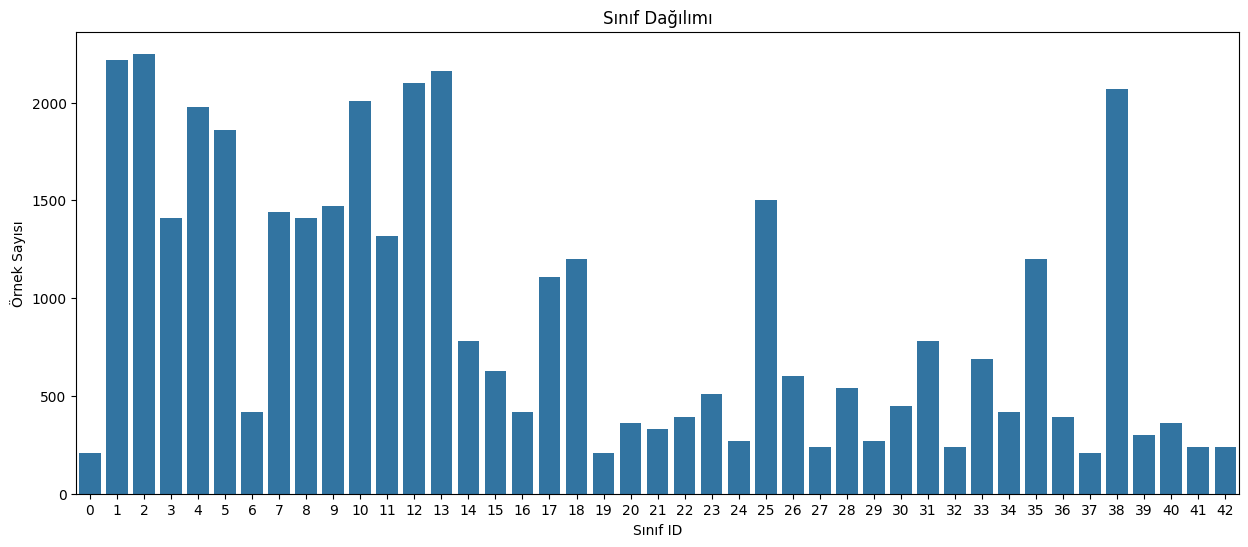

In [ ]:
# Sınıf dağılımını gösteren bir histogram çizimi
plt.figure(figsize=(15, 6))
sns.countplot(x='ClassId', data=train_df)
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf ID')
plt.ylabel('Örnek Sayısı')
plt.show()


In [ ]:
def load_gtsrb_data(image_size=(32, 32), data_dir = '/content/1/Train'):
    data = []
    labels = []

    # Klasör isimleri 0'dan 42'ye kadar olan etiketlerdir
    for label in range(43):  # GTSRB'de 43 farklı sınıf vardır
        folder = os.path.join(data_dir, str(label))
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            data.append(img)
            labels.append(label)

    data = np.array(data)
    labels = np.array(labels)

    # Veriyi normalize etme
    data = data / 255.0

    # Etiketleri one-hot encode etme
    labels = to_categorical(labels, num_classes=43)

    return data, labels

X, y = load_gtsrb_data(image_size=(32, 32))


# Eğitim ve Test Ayırımı

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLPClassifier ile Model Eğitimi

**MLPClassifier**, güçlü bir yapay sinir ağı modelidir ve çeşitli sınıflandırma problemlerini çözmek için kullanılır.

In [ ]:
# Veriyi standartlaştırma (sklearn için yaygın bir uygulama)
scaler = StandardScaler()
X_train = X_train.reshape(X_train.shape[0], -1)  # Görselleri 1D vektöre dönüştürme
X_test = X_test.reshape(X_test.shape[0], -1)  # Görselleri 1D vektöre dönüştürme
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:


# MLPClassifier ile model oluşturma
model = MLPClassifier(hidden_layer_sizes=(512, 256), max_iter=20, activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)

# Modeli test etme
accuracy = model.score(X_test, y_test)
print(f"Test accuracy: {accuracy}")


Test accuracy: 0.9058913542463657


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


# Eğitim Modelinin Karmaşıklık Matrisinin Çizimi

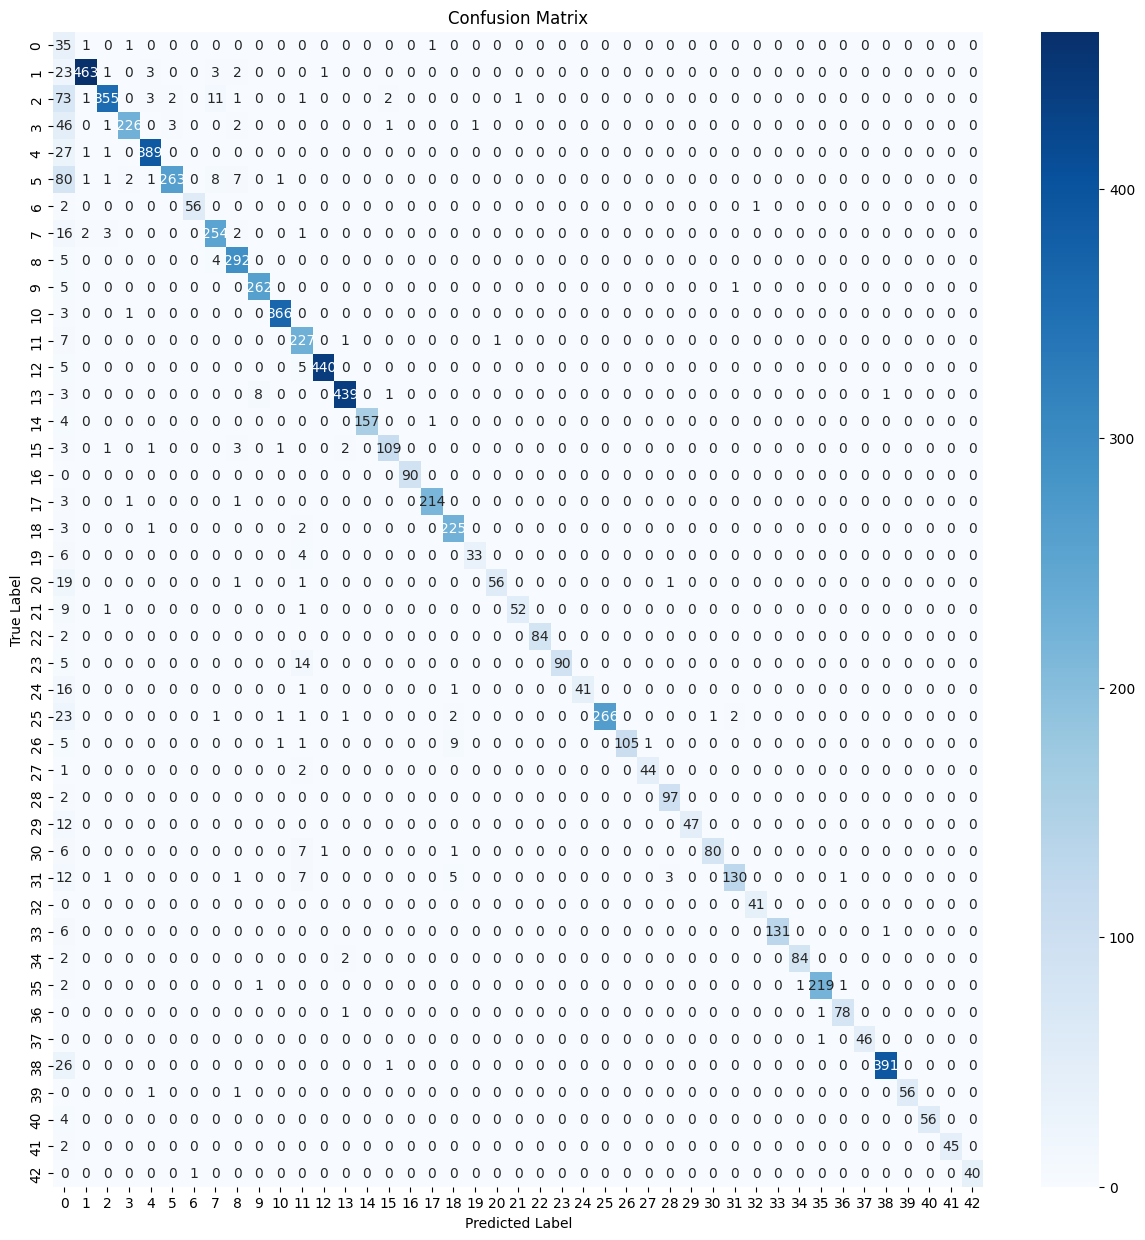

In [ ]:
# Tahminleri alın
y_pred = model.predict(X_test)

# One-hot encoded etiketleri gerçek etiketlere dönüştürün
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)


# Confusion Matrix oluşturma
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Eğitim Modelinin Metriklerin Hesaplanması

In [ ]:
# Tahminleri alın
y_pred = model.predict(X_test)

# One-hot encoded etiketleri gerçek etiketlere dönüştürün
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # weighted ortalamasını kullanın
recall = recall_score(y_true, y_pred, average='weighted')      # weighted ortalamasını kullanın
f1 = f1_score(y_true, y_pred, average='weighted')            # weighted ortalamasını kullanın

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.914817648559041
Precision: 0.9700765255802872
Recall: 0.914817648559041
F1-score: 0.9373870847507499


# GridSearch ile En iyi Hiperparametre Taraması

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (512, 256), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}
En iyi skor: 0.958523382231887
Accuracy: 0.9695230808467228
Precision: 0.9697034292036277
Recall: 0.9695230808467228
F1-score: 0.9694588081144029


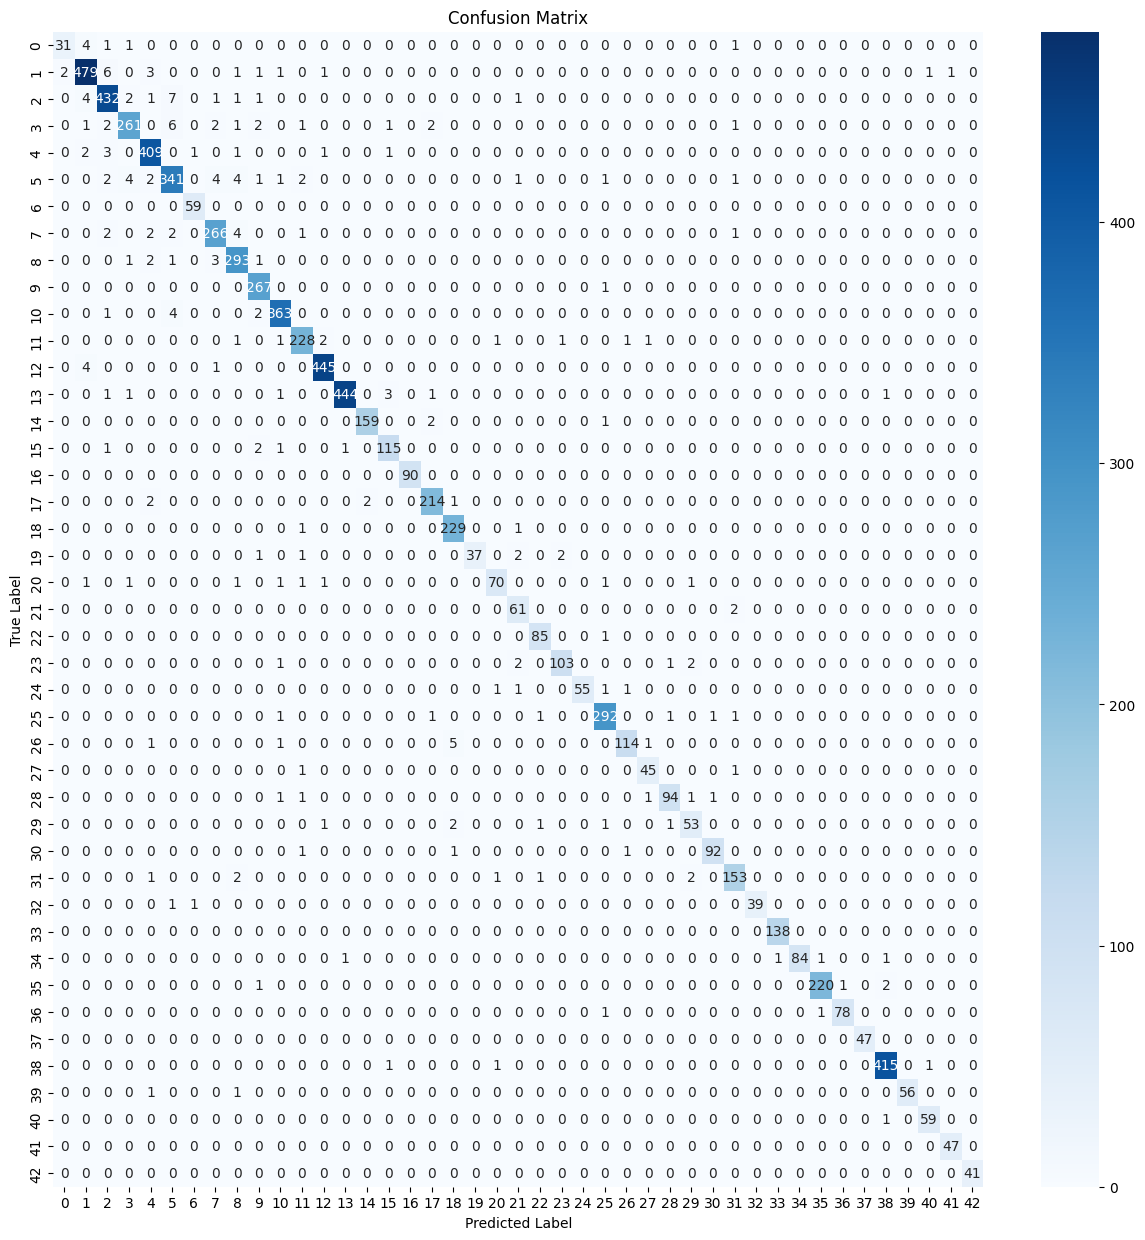

In [ ]:
# Örnek olarak GTSRB verisini yüklüyoruz
X, y = load_gtsrb_data(image_size=(32, 32))  # Verinizi yükleyin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştırma (sklearn için yaygın bir uygulama)
scaler = StandardScaler()
X_train = X_train.reshape(X_train.shape[0], -1)  # Görselleri 1D vektöre dönüştürme
X_test = X_test.reshape(X_test.shape[0], -1)  # Görselleri 1D vektöre dönüştürme
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# X_train_sample = X_train[:len(X_train)//10]  # X_train'in %10'u
# y_train_sample = y_train[:len(y_train)//10]  # y_train'in %10'u


# Parametre ızgarası (Daha küçük bir parametre aralığı)
param_grid = {
    'hidden_layer_sizes': [(256, 128), (512, 256)],  # Farklı katman boyutları
    'activation': ['relu', 'tanh'],  # İki yaygın aktivasyon fonksiyonu
    'solver': ['adam', 'sgd'],  # İki optimizasyon algoritması
    'max_iter': [50, 100],  # Maksimum iterasyon sayısı
    'alpha': [0.0001, 0.001],  # L2 regularizasyon parametreleri
    'learning_rate': ['constant', 'adaptive'],  # Öğrenme oranı stratejileri
}


# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(
    MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10),
    param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2, error_score='raise'
)

# Küçük veri kümesiyle eğitim
grid_search.fit(X_train, np.argmax(y_train, axis=1))  # y_train one-hot encoding, etiketlere dönüştürülüyor

# En iyi modeli ve parametreleri yazdır
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

# En iyi modeli kullanarak test verileri üzerinde tahmin yapın
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix oluşturma
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Modelin Hiç Görmediği Veriler Üzerindeki Performansı

In [ ]:
# prompt: validation_df de bir döngü ile ClassId ve Path kolonlarını yazdır
def load_gtsrb_val_data(image_size=(32, 32)):
    folder = os.path.join("/content/1")
    data = []
    labels = []

    for index, row in validation_df.iterrows():
        img_path = os.path.join(folder, row['Path'])
        img = cv2.imread(img_path)
        img = cv2.resize(img, image_size)
        data.append(img)
        labels.append(row['ClassId'])


    data = np.array(data)
    labels = np.array(labels)

    # Veriyi normalize etme
    data = data / 255.0

    # Etiketleri one-hot encode etme
    labels = to_categorical(labels, num_classes=43)


    return data, labels

In [ ]:
# Test verilerini yükleyin (dosya yolu güncellendi)
X_valid_test, y_valid_test = load_gtsrb_val_data()

X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_valid_test, y_valid_test, test_size=0.01, random_state=42)


# Veriyi standartlaştırma
scaler = StandardScaler()
X_train_valid = X_train_valid.reshape(X_train_valid.shape[0], -1)  # Görselleri 1D vektöre dönüştürme
X_train_valid = scaler.fit_transform(X_train_valid)


# Modeli test etme
accuracy = best_model.score(X_train_valid, np.argmax(y_train_valid, axis=1))
print(f"Validation Test accuracy: {accuracy}")


Validation Test accuracy: 0.8360393505558666


# MLPClassifier Sonuç

**Hiperparametreleri** *hidden_layer_sizes=(512, 256), max_iter=20, activation='relu', solver='adam', random_state=42*

olan model için eğitim sonuçları;

Accuracy: 0.914817648559041
Precision: 0.9700765255802872
Recall: 0.914817648559041
F1-score: 0.9373870847507499

Hiç görmediği datalarda Validation Test accuracy: 0.818283611933136

**Gridsearch ile elde edilen sonuca göre**;

*En iyi parametreler: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (512, 256), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}*

En iyi skor: 0.958523382231887
Accuracy: 0.9695230808467228
Precision: 0.9697034292036277
Recall: 0.9695230808467228
F1-score: 0.9694588081144029 olarak hesaplanmıştır.

Hiç görmediği datalarda Validation Test accuracy: 0.8360393505558666

***Her iki çözüm yöntemi sonuçlarına göre, aşağıdaki sonuca varılmıştır.***

**Model overfitting (aşırı uyum) yapmış**

İyileştirmek için öneriler:
*   Daha fazla eğitim verisi eklemek
*   Regularization (düzenleme) teknikleri kullanmak
*   Hidden layers ayarlarını düzenlemek
*   Early Stopping ve Dropout gibi yöntemlerle overfitting'i engellemeyi denemek.
*   Overfitting riskini azaltmak için learning rate (öğrenme oranı) ayarlamaları değiştirilebilir
*   Farklı Max iter denemeleri yapmak






Gridsearch uzun sürmüştür (2saat+). Bunun yerine randomizedSearch kullanmak daha kısa sürebilir.

# RBF (Radial Basis Function)

**RBF (Radial Basis Function) sinir ağı**, yapay sinir ağları içinde kullanılan bir model türüdür ve özellikle sınıflandırma, regresyon gibi problemlerde kullanılır. RBF sinir ağları, girdilere verilen tepkiyi, genellikle radyal tabanlı bir fonksiyon kullanarak işler. Bu fonksiyon, genellikle Gauss fonksiyonu (veya benzeri bir fonksiyon) şeklinde tanımlanır ve ağın her bir nöronunun, giriş verileriyle olan mesafesini kullanarak çıkış verir.

RBF sinir ağları genellikle şu bileşenlere sahiptir:

**Giriş katmanı**: Bu katman, ağın aldığı veriyi (girdi) temsil eder.

**Gizli katman (Radyal Temel Fonksiyon Katmanı)**: Bu katman, nöronlarının her birinin, giriş verisine karşılık bir radyal fonksiyon uyguladığı katmandır. Bu fonksiyonlar genellikle Gauss fonksiyonu gibi fonksiyonlardır ve her nöronun bir "merkez" değerine göre çalışır. Bu merkezler, giriş verileriyle olan mesafeye göre etkinlik gösterir.

**Çıkış katmanı**: Çıkış katmanı, ağın son yanıtını verir ve genellikle doğrusal fonksiyon kullanılarak çıkış verisini üretir.

# RBF (Direkt Image'lar ile Eğitim)

In [ ]:
# GTSRB veri setini yükleme fonksiyonu
def load_gtsrb_data(image_size=(32, 32), data_dir='/content/1/Train'):
    data = []
    labels = []

    # Klasör isimleri 0'dan 42'ye kadar olan etiketlerdir
    for label in range(43):  # GTSRB'de 43 farklı sınıf vardır
        folder = os.path.join(data_dir, str(label))
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            data.append(img)
            labels.append(label)

    data = np.array(data)
    labels = np.array(labels)

    # Veriyi normalize etme
    data = data / 255.0

    # Etiketleri one-hot encode etme
    labels = to_categorical(labels, num_classes=43)

    return data, labels



In [ ]:
# RBF Layer tanımlaması
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # 'mu' merkezlerini initialize ediyoruz
        self.mu = self.add_weight(name='mu',
                                  shape=(self.units, int(input_shape[1])),  # shape=(num_centers, input_dim)
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # inputs'un her bir örneğini merkezlerle karşılaştırarak Euclidean mesafesini hesaplıyoruz
        diff = tf.expand_dims(inputs, 1) - self.mu  # (batch_size, 1, input_dim) - (num_centers, input_dim)
        l2 = tf.reduce_sum(tf.square(diff), axis=2)  # (batch_size, num_centers)
        res = tf.exp(-self.gamma * l2)  # RBF kernel fonksiyonu
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)



# RBF Neural Network Modeli
def create_rbf_model(num_centers=10, gamma=1.0, input_dim=3072, num_classes=43):
    model = keras.Sequential([
        RBFLayer(units=num_centers, gamma=gamma),  # 'units' burada num_centers olarak geçilecek
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [ ]:

# Veriyi yükle ve işleyelim
X, y = load_gtsrb_data(image_size=(32, 32), data_dir='/content/1/Train')

# Veriyi Eğitim ve Test Kümesine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştırma (sklearn için yaygın bir uygulama)
scaler = StandardScaler()

# Görselleri 1D vektöre dönüştürme
X_train = X_train.reshape(X_train.shape[0], -1)  # 1D vektörler
X_test = X_test.reshape(X_test.shape[0], -1)    # 1D vektörler

# Veriyi standartlaştırma
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Modeli oluşturma
rbf_model1 = create_rbf_model(num_centers=20, gamma=1.0, input_dim=X_train.shape[1], num_classes=y_train.shape[1])

# Modeli eğitme
history1 = rbf_model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Modeli test etme
test_score1 = rbf_model1.evaluate(X_test, y_test)
print(f"Test Seti Doğruluk: {test_score1[1]}")


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0559 - loss: 3.6866 - val_accuracy: 0.0574 - val_loss: 3.5452
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0550 - loss: 3.5346 - val_accuracy: 0.0574 - val_loss: 3.4945
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0576 - loss: 3.4998 - val_accuracy: 0.0574 - val_loss: 3.4826
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0555 - loss: 3.4941 - val_accuracy: 0.0574 - val_loss: 3.4796
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0588 - loss: 3.4832 - val_accuracy: 0.0574 - val_loss: 3.4789
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0589 - loss: 3.4881 - val_accuracy: 0.0574 - val_loss: 3.4785
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0593 - loss: 3.4883 - val_accuracy: 0.0574 - val_loss: 3.4784
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0570 - loss: 3.4868 - val_accuracy: 0.

# Başka Hiperparametre ile Deneme

In [ ]:

# Modeli oluşturma
rbf_model3 = create_rbf_model(num_centers=43, gamma=1.0, input_dim=X_train.shape[1], num_classes=y_train.shape[1])

# Modeli eğitme
history3 = rbf_model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Modeli test etme
test_score3 = rbf_model3.evaluate(X_test, y_test)
print(f"Test Seti Doğruluk: {test_score3[1]}")


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0573 - loss: 3.6863 - val_accuracy: 0.0574 - val_loss: 3.5447
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0579 - loss: 3.5298 - val_accuracy: 0.0574 - val_loss: 3.4943
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0577 - loss: 3.4981 - val_accuracy: 0.0574 - val_loss: 3.4825
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0562 - loss: 3.4909 - val_accuracy: 0.0574 - val_loss: 3.4796
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0590 - loss: 3.4868 - val_accuracy: 0.0574 - val_loss: 3.4787
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0588 - loss: 3.4826 - val_accuracy: 0.0574 - val_loss: 3.4785
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0571 - loss: 3.4876 - val_accuracy: 0.0574 - val_loss: 3.4785
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0568 - loss: 3.4857 - val_accuracy: 0.

# Dataframe'i GridSearch Kullanarak RBF Sinir Ağı ile Eğitme

En iyi hiperparametreler: {'gamma': 0.1, 'n_centers': 183}
Model doğruluğu: 6.04%


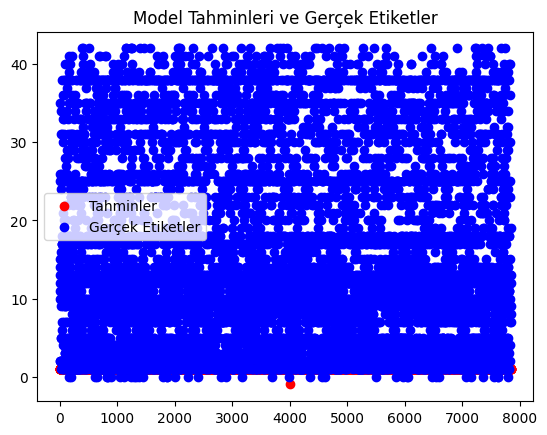

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Gaussian RBF Kernel fonksiyonu
def rbf_kernel(X1, X2, gamma=1.0):
    """
    X1 ve X2, RBF kernel fonksiyonu ile hesaplanacak iki veri kümesidir.
    """
    sq_dist = np.sum((X1 - X2) ** 2, axis=1)
    return np.exp(-gamma * sq_dist)

# RBF Sinir Ağı sınıfı
class RBFNetwork:
    def __init__(self, n_centers=3, gamma=1.0):
        """
        n_centers: RBF katmanındaki merkez sayısı
        gamma: RBF kernel'inin genişlik parametresi
        """
        self.n_centers = n_centers
        self.gamma = gamma

    def fit(self, X, y):
        """
        Modeli eğitim verisi ile eğitmek.
        """
        # Merkezi noktalar (veri kümesindeki rastgele örnekler)
        self.centers = X[np.random.choice(X.shape[0], self.n_centers, replace=False)]

        # RBF kernel fonksiyonunu kullanarak merkezlerden özelliklere aktarım
        Phi = self._transform(X)

        # Lineer regresyonla ağırlıkları öğrenme
        self.weights = np.linalg.pinv(Phi).dot(y)

    def _transform(self, X):
        """
        Veriyi RBF kernel fonksiyonu ile dönüştür.
        """
        transformed = np.zeros((X.shape[0], self.n_centers))
        for i, center in enumerate(self.centers):
            transformed[:, i] = rbf_kernel(X, center, gamma=self.gamma)
        return transformed

    def predict(self, X):
        """
        Test verisi üzerinde tahmin yapmak.
        """
        Phi = self._transform(X)
        return np.sign(Phi.dot(self.weights))  # Sınıf tahminleri

    def get_params(self, deep=True):
        """
        Modelin parametrelerini döndürür (GridSearch için gereklidir).
        """
        return {'n_centers': self.n_centers, 'gamma': self.gamma}

    def set_params(self, **params):
        """
        Modelin parametrelerini ayarlar (GridSearch için gereklidir).
        """
        for param, value in params.items():
            setattr(self, param, value)
        return self


# Veri kümesini yükleyin
data = train_df

# Bağımsız değişkenler (girdi öznitelikleri)
X = data[['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2']].values

# Bağımlı değişken (sınıf etiketleri)
y = data['ClassId'].values

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RBF Ağı Modeli için GridSearchCV kullanımı
param_grid = {
    'n_centers': [183, 195, 407],  # RBF merkezlerinin sayısı
    'gamma': [0.1, 1.0, 10]  # RBF kernel parametresi
}

# Modeli GridSearchCV ile optimize etme
rbf_model = RBFNetwork(n_centers=3, gamma=1.0)  # Başlangıç parametreleri
grid_search = GridSearchCV(estimator=rbf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# GridSearch ile eğitim
grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreler
print("En iyi hiperparametreler:", grid_search.best_params_)

# En iyi model ile test seti üzerinde tahmin yapma
best_rbf_model = grid_search.best_estimator_
y_pred = best_rbf_model.predict(X_test_scaled)

# Doğruluk hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Model doğruluğu: {accuracy * 100:.2f}%")

# Sonuçları görselleştirme
plt.scatter(range(len(y_pred)), y_pred, label="Tahminler", c='r')
plt.scatter(range(len(y_test)), y_test, label="Gerçek Etiketler", c='b')
plt.legend()
plt.title("Model Tahminleri ve Gerçek Etiketler")
plt.show()


# RBF Yapay Sinir Ağı ve MLP Karşılaştırma Sonucu

**RBF ağında**; giriş bilgileri hem resim hemde verisetindeki öznitelikler ile  denenerek model oluşturulmuştur. Sonuçların çok kötü olduğu bilgisine ulaşılmıştır. Farklı hiperparametre taramaları yapılarak iyileştirme denenmiş ama olumlu yol katedilememiştir.

**MLP ağında**, elde edilen sonuçlar eğitim aşamasında çok başarılı gözükmektedir. Ama hiç görmediği verilerde ise biraz düşüş yaşanmıştır. Bunu daha iyi seviyeye getirmek için önerilerde bulunulmuştur.